In [1]:
import tensorflow as tf
from keras import models
import numpy as np
import pandas as pd

In [2]:
def Image(name_file, min_x, max_x, min_y, max_y):
    global data1, data2 
    
    #upload image
    img = tf.keras.preprocessing.image.load_img(
        name_file, grayscale=False, color_mode="grayscale")
    
    # Chuyển hình ảnh thành mảng col*row với giá trị nằm trong khoảng [0, 255]
    # Giá trị đồ thị( màu đen) nằm trong khoảng (1, 200)
    # Giá trị của phần nền(màu trắng) nằm trong khoảng (200, 255)
    array = tf.keras.utils.img_to_array(img)
    
    col = len(array[:, 0]) #collom of array
    row = len(array[0, :]) #row of array
    
    arr = array[:, :, 0]
    arr = arr.reshape(col, row)
    print(col, row)
    
#------------------------------------------------------------------------------#   

    #cắt khoảng trằng bên phải( xóa row)
    count = [None]*row
    white = np.arange(200, 256, 1)
    k1 = 0
    while(k1<row):
        count[k1] = 0
        for j in range(0, col, 1):
            if any(arr[j, -1] == num for num in white):
                count[k1] += 1
                if(count[k1] == int(2*col/3)):
                    arr = np.delete(arr, -1, axis=1)
                    #print(k1)
                    break

        if(count[k1]<int(col/3)):
            break

        k1 = k1+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, -1, axis=1)

    row = len(arr[0, :]) # cập nhật lại số cột
    
#------------------------------------------------------------------------------#   

    #cắt khoảng trằng phía trên( xóa collums)
    count = [None]*row
    white = np.arange(200, 256, 1)
    k2 = 0
    while(k2<col):
        count[k2] = 0
        for j in range(0, row, 1):
            if any(arr[0, j] == num for num in white):
                count[k2] += 1
                if(count[k2] == int(2*row/3)):
                    arr = np.delete(arr, 0, axis=0)
                    #print(k2)
                    break

        if(count[k2]<int(row/3)):
            break

        k2 = k2+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, 0, axis=0)

    col = len(arr[:, 0]) # cập nhật lại số hàng
    
#------------------------------------------------------------------------------#   
    
    #cắt khoảng trằng phía dưới( xóa collums)
    k3 = 0
    while(k3<col):
        count[k3] = 0
        for j in range(0, row, 1):
            if any(arr[-1, j] == num for num in white):
                count[k3] += 1
                if(count[k3] == int(2*row/3)):
                    arr = np.delete(arr, -1, axis=0)
                    #print(k3)
                    break

        if(count[k3]<int(row/3)):
            break

        k3 = k3+1

    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, -1, axis=0)

    col = len(arr[:, 0]) # cập nhật lại số hàng

#------------------------------------------------------------------------------#   

    #cắt khoảng trằng phía bên trái( xóa row_cột)
    count = [None]*row
    white = np.arange(200, 256, 1)
    
    k4 = 0
    while(k4<row):
        count[k4] = 0
        for j in range(0, col, 1):
            if any(arr[j, 0] == num for num in white):
                count[k4] += 1
                if(count[k4] == 100):
                    arr = np.delete(arr, 0, axis=1)
                    #print(k4)
                    break

        if(count[k4]<int(col/3)):
            break

        k4 = k4+1
    # Xóa trục
    for i in range(0, 2, 1):
        arr = np.delete(arr, 0, axis=1)

    row = len(arr[0, :]) # cập nhật lại số cột
#------------------------------Tính Extinction(Phổ nằm bên trên)------------------------------------------------#
# Vòng for chạy từ giá trị đầu tiên của cột xuống dưới gặp giá trị 
    x1 = []
    y1 = []
    black = np.arange(0, 200, 1)
    for index_row in range(0, row, 1):
        for index_col in range(1, col, 1):
            if any(arr[index_col, index_row] == num for num in black):
                k = index_col
                break

        if(arr[index_col, index_row]<150):
            x1 = x1 + [min_x + ((2+index_row)/row)*(max_x - min_x)]
            y1 = y1 + [min_y + ((2+col-k)/col)*(max_y - min_y)]
   
    x1 = np.array([x1]).T
    y1 = np.array([y1]).T
    data1 = np.concatenate((x1, y1),axis = 1)
    print(data1)

#--------------------------------Tính Absortion(Phổ nằm bên dưới)---------------------------------------------
# Vòng for chạy từ giá trị cuối cùng của cột lên trên
    x2 = []
    y2 = []
    black = np.arange(0, 200, 1)
    for index_row in range(0, row, 1):
        for index_col in range(col-1, -1, -1):
            if any(arr[index_col, index_row] == num for num in black):
                k = index_col
                break

        if(arr[index_col, index_row]<150):
            x2 = x2 + [min_x + ((index_row)/row)*(max_x - min_x)]
            y2 = y2 + [min_y + ((col-k)/col)*(max_y - min_y)]
    x2 = np.array([x2]).T
    y2 = np.array([y2]).T
    data2 = np.concatenate((x2, y2),axis = 1)
    print(data2)

In [3]:
print("Upload your file image")
name_file = input("name_file = ") #2_test.png

print("Nhap gia tri nho nhat cua buoc song/nang luong: ") #0
min_x = float(input("min_x = "))

print("Nhap gia tri lon nhat cua buoc song/nang luong: ") #5
max_x = float(input("max_x = "))

print("Nhap gia tri nho nhat cua pho ") #0
min_y = float(input("min_y = "))

print("Nhap gia tri lon nhat cua pho ")#4220.89
max_y = float(input("max_y = "))

Image(name_file, min_x, max_x, min_y, max_y)

Upload your file image
name_file = 2_test.png
Nhap gia tri nho nhat cua buoc song/nang luong: 
min_x = 0
Nhap gia tri lon nhat cua buoc song/nang luong: 
max_x = 5
Nhap gia tri nho nhat cua pho 
min_y = 0
Nhap gia tri lon nhat cua pho 
max_y = 4220.89
320 454
[[4.87804878e-01 5.00500791e+01]
 [1.14329268e+00 8.34167984e+01]
 [1.15853659e+00 8.34167984e+01]
 [1.17378049e+00 8.34167984e+01]
 [1.18902439e+00 8.34167984e+01]
 [1.32621951e+00 1.00100158e+02]
 [1.35670732e+00 1.16783518e+02]
 [1.37195122e+00 1.16783518e+02]
 [1.38719512e+00 1.16783518e+02]
 [1.40243902e+00 1.16783518e+02]
 [1.57012195e+00 1.66833597e+02]
 [1.58536585e+00 1.66833597e+02]
 [1.60060976e+00 1.66833597e+02]
 [1.61585366e+00 1.66833597e+02]
 [1.63109756e+00 1.66833597e+02]
 [1.64634146e+00 1.66833597e+02]
 [1.66158537e+00 1.66833597e+02]
 [1.67682927e+00 1.66833597e+02]
 [1.69207317e+00 1.66833597e+02]
 [1.70731707e+00 1.66833597e+02]
 [1.72256098e+00 1.66833597e+02]
 [1.79878049e+00 1.83516957e+02]
 [1.81402439e+

<Figure size 1800x1200 with 0 Axes>

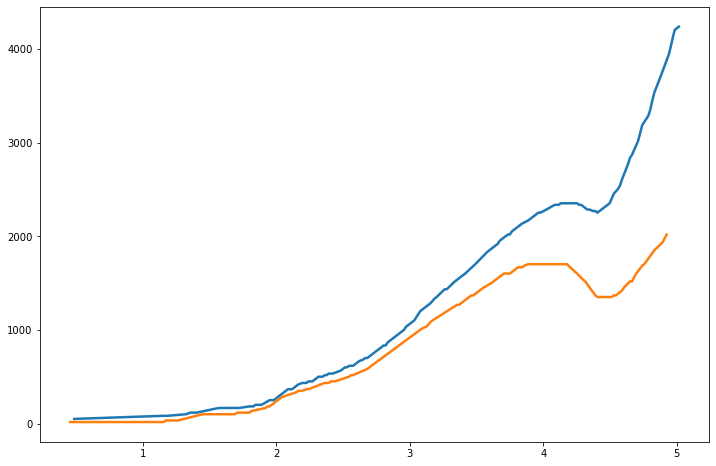

In [4]:
import matplotlib.pyplot as plt
plt.figure(dpi = 300)
plt.figure(figsize=(12, 8))
plt.plot(data1[:, 0], data1[:, 1], linewidth = 2.5)
plt.plot(data2[:, 0], data2[:, 1], linewidth = 2.5)

### Độ chính xác , sai số

In [5]:
e1 = np.array(data1[:, 0])
q1 = np.array(data1[:, 1])
e2 = np.array(data2[:, 0])
q2 = np.array(data2[:, 1])

In [6]:
#au = pd.read_csv("image2.csv")
au = pd.read_csv("2_test.csv")
au

,0.5,3.2519012,3.1732841
0,0.523,3.396431,3.302442
1,0.545,3.510491,3.398943
2,0.568,3.656588,3.525098
3,0.590,3.797368,3.643330
4,0.613,3.948889,3.769461
...,...,...,...
194,4.910,3807.999336,1965.137768
195,4.932,3908.637130,2013.347944
196,4.955,4010.722095,2062.805327
197,4.977,4114.917459,2113.710297


In [7]:
au = np.array(au)
eV = np.array(au[:, 0])
Ext = np.array(au[:, 1])
Abs = np.array(au[:, 2])

#### Sai số phổ nằm phía trên

In [8]:
from scipy import interpolate
q_interpolate = interpolate.interp1d(eV, Ext, kind='cubic')
Extinction = q_interpolate(e1[20:len(e1)-20])                  

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error : %f" %mean_squared_error(Extinction, q1[20:len(e1)-20]))
print("R2 score : %f %%" %(100*r2_score(Extinction, q1[20: len(e1)-20])))

Mean squared error : 2987.506115
R2 score : 99.510323 %


<Figure size 1800x1200 with 0 Axes>

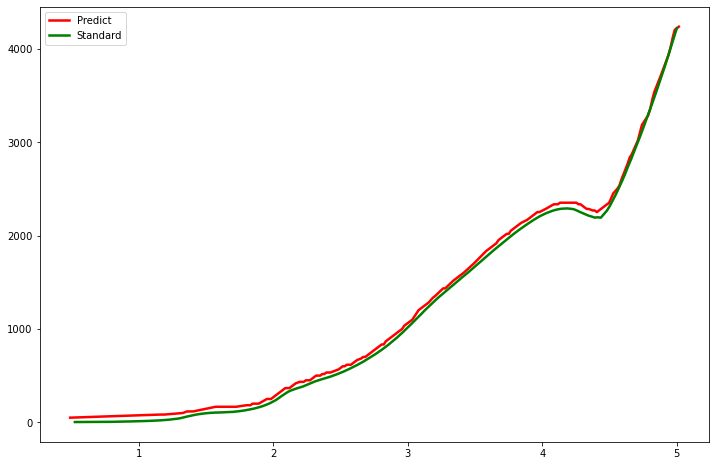

In [10]:
plt.figure(dpi = 300)
plt.figure(figsize=(12, 8))
plt.plot(e1, q1, linewidth = 2.5, color = 'r',label='Predict')
plt.plot(eV, Ext, linewidth = 2.5, color = 'g', label='Standard')
plt.legend()

#### Sai số phổ nằm phía dưới

In [11]:
q_interpolate = interpolate.interp1d(eV, Abs, kind='cubic')
Absorption = q_interpolate(e2[20:len(e2)-20])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error : %f" %mean_squared_error(Absorption, q2[20:len(e2)-20]))
print("R2 score : %f %%" %(100*r2_score(Absorption, q2[20: len(e2)-20])))

Mean squared error : 442.501739
R2 score : 99.857575 %


<Figure size 1800x1200 with 0 Axes>

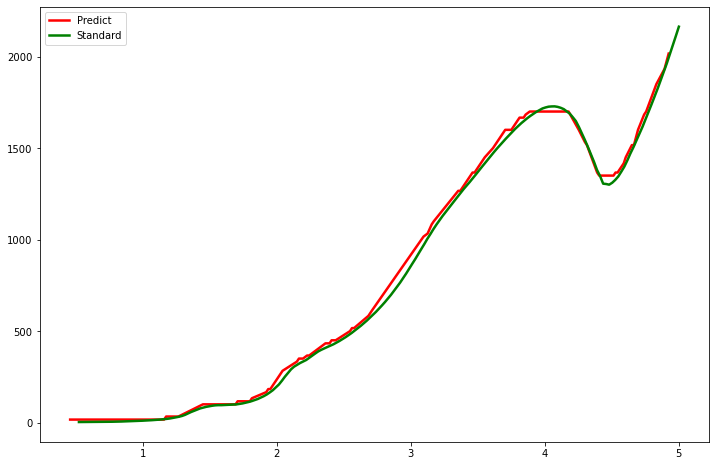

In [13]:
plt.figure(dpi = 300)
plt.figure(figsize=(12, 8))
plt.plot(e2, q2, linewidth = 2.5, color = 'r', label='Predict')
plt.plot(eV, Abs, linewidth = 2.5, color = 'g', label='Standard')
plt.legend()